## Univariate LSTM

###1. Import Libraries and modules

In [256]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [257]:
path= "drive/MyDrive/COGS_Project/Model/"

In [258]:
train = pd.read_csv(path+'Google_Stock_Price_Train.csv')

In [259]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### 2. Pre-processing

In [263]:
training_set=train.iloc[:,1:2].values

In [264]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [265]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set_scaled)

In [266]:
training_set_scaled = training_set

In [267]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [268]:
#reshape it to (batche_size(#size of inputs),timesteps,input_dimension)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [269]:
X_train.shape

(1198, 60, 1)

### 3. Build Model

In [270]:
X_train.shape[1]

60

In [271]:
regressor=Sequential()

In [272]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.4))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
38/38 [==============================] - 15s 207ms/step - loss: 309428.8438
Epoch 2/10
38/38 [==============================] - 8s 205ms/step - loss: 301453.0312
Epoch 3/10
38/38 [==============================] - 8s 206ms/step - loss: 296907.5312
Epoch 4/10
38/38 [==============================] - 8s 207ms/step - loss: 292739.2812
Epoch 5/10
38/38 [==============================] - 8s 207ms/step - loss: 288667.6250
Epoch 6/10
38/38 [==============================] - 8s 207ms/step - loss: 284572.3125
Epoch 7/10
38/38 [==============================] - 8s 206ms/step - loss: 280806.5625
Epoch 8/10
38/38 [==============================] - 8s 206ms/step - loss: 277008.1250
Epoch 9/10
38/38 [==============================] - 8s 207ms/step - loss: 273355.3125
Epoch 10/10
38/38 [==============================] - 8s 206ms/step - loss: 269641.9688


In [246]:
test = pd.read_csv(path+'Google_Stock_Price_Test.csv')
real_stock_price = test.iloc[:, 1:2].values
total_data=pd.concat([train['Open'],test['Open']],axis=0)

In [273]:
total_data

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [281]:
train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [274]:
inputs=total_data[len(train)-len(test)-60:].values

print(len(train))
print(len(test))
print(len(train)-len(test))

print(len(inputs))
inputs=inputs.reshape(-1,1)
#inputs = sc.transform(inputs)
inputs = inputs

1258
20
1238
100


In [275]:
inputs.shape

(100, 1)

In [276]:
len(inputs)

100

In [277]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [278]:
X_test.shape

(20, 60, 1)

In [279]:
predicted_stock_price=regressor.predict(X_test)
#predicted_stock_price=sc.inverse_transform(predicted_stock_price)

###4. View Results

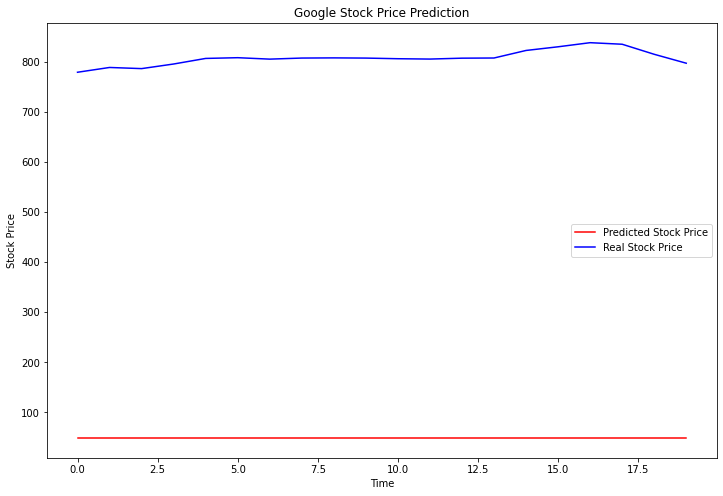

In [280]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Multivariate LSTM

Construct a multivariate LSTM using other datasets

###1. Import Modules

In [706]:
path = "drive/MyDrive/COGS_Project/Model/Multivariate_example/"

In [707]:
import os
import pandas as pd

In [708]:
os.listdir(path)

['AAPL.csv', 'GOOG (1).csv', 'BABA.csv', 'AMZN.csv', 'PBR.csv', 'LMT.csv']

In [709]:
df = pd.read_csv(path + os.listdir(path)[0]).set_index("Date")
for x,i in enumerate(os.listdir(path)):
  if x>0:
    print(x)
    df_i = pd.read_csv(path + i).set_index("Date")
    df = pd.concat([df,df_i],axis=1,join="inner")
  else:
    continue
    



1
2
3
4
5


predict open price

In [710]:
df

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-09-19,25.572500,25.587500,25.125000,25.240000,22.752850,283609600,589.880493,594.846863,587.885986,594.447937,594.447937,3736631,92.699997,99.699997,89.949997,93.889999,93.889999,271879400,327.600006,332.760010,325.570007,331.320007,331.320007,6886200,17.08,17.150000,16.540001,16.780001,14.872942,25333800,180.490005,181.220001,180.220001,180.740005,149.588821,1896300
2014-09-22,25.450001,25.535000,25.145000,25.264999,22.775393,211153600,592.194153,592.322754,581.862488,585.761780,585.761780,1689526,92.699997,92.949997,89.500000,89.889999,89.889999,66657800,328.489990,329.489990,321.059998,324.500000,324.500000,3109700,15.83,16.200001,15.660000,16.110001,14.279092,40386800,179.720001,180.759995,178.759995,178.990005,148.140411,1097400
2014-09-23,25.150000,25.735001,25.135000,25.660000,23.131462,253608800,585.243225,585.243225,579.409241,579.538879,579.538879,1471429,88.940002,90.480003,86.620003,87.169998,87.169998,39009800,322.459991,327.600006,321.250000,323.630005,323.630005,2352600,16.10,16.549999,15.670000,15.920000,14.110684,32178100,178.529999,178.979996,175.919998,176.339996,145.947174,1451100
2014-09-24,25.540001,25.712500,25.299999,25.437500,22.930882,240687200,579.867981,588.015625,578.930542,586.380066,586.380066,1728132,88.470001,90.570000,87.220001,90.570000,90.570000,32088000,324.170013,329.440002,319.559998,328.209991,328.209991,2642200,15.84,16.250000,15.540000,16.030001,14.208182,25698400,176.279999,178.500000,176.279999,178.389999,147.643845,959400
2014-09-25,25.127501,25.177500,24.430000,24.467501,22.056473,400368000,585.941284,586.370117,572.607910,573.485474,573.485474,1925973,91.089996,91.500000,88.500000,88.919998,88.919998,28598000,327.989990,328.540009,321.399994,321.929993,321.929993,2928800,15.75,15.880000,15.480000,15.560000,13.791598,23609800,178.100006,178.740005,176.259995,177.440002,146.857590,1739100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-11,148.960007,149.429993,147.679993,147.869995,147.869995,41000000,2942.139893,2970.044922,2933.889893,2934.959961,2934.959961,623200,166.559998,169.630005,166.559998,167.850006,167.850006,16747500,3513.000000,3543.239990,3467.469971,3472.500000,3472.500000,2264400,10.11,10.250000,10.070000,10.180000,10.180000,19157700,337.140015,337.209991,333.299988,335.890015,335.890015,1216500
2021-11-12,148.429993,150.399994,147.479996,149.990005,149.990005,63632600,2956.629883,2997.189941,2929.080078,2992.909912,2992.909912,852000,165.173996,167.800003,163.399994,166.809998,166.809998,13728200,3485.000000,3540.729980,3447.050049,3525.149902,3525.149902,2688500,10.05,10.230000,9.900000,10.230000,10.230000,20166800,335.619995,340.390015,335.029999,339.059998,339.059998,1097400
2021-11-15,150.369995,151.880005,149.429993,150.000000,150.000000,59222800,3000.000000,3009.540039,2973.050049,2987.760010,2987.760010,812400,167.220001,168.460007,165.669998,166.539993,166.539993,9655700,3537.000000,3593.879883,3525.810059,3545.679932,3545.679932,2929700,10.25,10.420000,10.120000,10.330000,10.330000,14921000,339.549988,341.649994,339.429993,340.920013,340.920013,1068600


In [711]:
combined_set=df.iloc[:,[0,6,12,18,24,30]]

In [712]:
training_set = combined_set

In [713]:
training_set_old = training_set.iloc[:1500]

In [714]:
sc = MinMaxScaler(feature_range = (0, 1))
#training_set_scaled = sc.fit_transform(training_set_scaled)

In [715]:
training_set = training_set_old.values

In [716]:
#training_set_scaled = sc.fit_transform(training_set_scaled)

In [717]:
training_set = training_set.T

In [718]:
original_test_set_old = combined_set.iloc[1500:]

In [719]:
originial_test_set = original_test_set_old.values

In [720]:
originial_test_set = originial_test_set.T

In [721]:
originial_test_set.shape

(6, 305)

In [722]:
total_data=pd.concat([training_set_old,original_test_set_old],axis=0)

In [723]:
total_data

,Open,Open,Open,Open,Open,Open
Date,,,,,,
2014-09-19,25.572500,589.880493,92.699997,327.600006,17.08,180.490005
2014-09-22,25.450001,592.194153,92.699997,328.489990,15.83,179.720001
2014-09-23,25.150000,585.243225,88.940002,322.459991,16.10,178.529999
2014-09-24,25.540001,579.867981,88.470001,324.170013,15.84,176.279999
2014-09-25,25.127501,585.941284,91.089996,327.989990,15.75,178.100006
...,...,...,...,...,...,...
2021-11-11,148.960007,2942.139893,166.559998,3513.000000,10.11,337.140015
2021-11-12,148.429993,2956.629883,165.173996,3485.000000,10.05,335.619995
2021-11-15,150.369995,3000.000000,167.220001,3537.000000,10.25,339.549988


In [724]:
inputs=total_data[len(combined_set)-len(original_test_set_old)-60:]

In [725]:
inputs

,Open,Open,Open,Open,Open,Open
Date,,,,,,
2020-06-10,86.974998,1459.540039,222.000000,2645.000000,9.36,406.500000
2020-06-11,87.327499,1442.479980,218.000000,2603.500000,8.20,392.690002
2020-06-12,86.180000,1428.489990,218.500000,2601.209961,8.50,393.329987
2020-06-15,83.312500,1390.800049,214.110001,2526.600098,7.81,373.279999
2020-06-16,87.864998,1445.219971,221.000000,2620.000000,8.80,386.559998
...,...,...,...,...,...,...
2021-11-11,148.960007,2942.139893,166.559998,3513.000000,10.11,337.140015
2021-11-12,148.429993,2956.629883,165.173996,3485.000000,10.05,335.619995
2021-11-15,150.369995,3000.000000,167.220001,3537.000000,10.25,339.549988


In [726]:
training_set

array([[  25.5725  ,   25.450001,   25.15    , ...,  127.580002,
         132.759995,  137.589996],
       [ 589.880493,  592.194153,  585.243225, ..., 1647.890015,
        1636.630005, 1673.775024],
       [  92.699997,   92.699997,   88.940002, ...,  288.619995,
         289.200012,  299.      ],
       [ 327.600006,  328.48999 ,  322.459991, ..., 3408.98999 ,
        3489.580078, 3547.      ],
       [  17.08    ,   15.83    ,   16.1     , ...,    8.36    ,
           8.47    ,    8.72    ],
       [ 180.490005,  179.720001,  178.529999, ...,  392.170013,
         387.820007,  385.149994]])

In [727]:
training_set

array([[  25.5725  ,   25.450001,   25.15    , ...,  127.580002,
         132.759995,  137.589996],
       [ 589.880493,  592.194153,  585.243225, ..., 1647.890015,
        1636.630005, 1673.775024],
       [  92.699997,   92.699997,   88.940002, ...,  288.619995,
         289.200012,  299.      ],
       [ 327.600006,  328.48999 ,  322.459991, ..., 3408.98999 ,
        3489.580078, 3547.      ],
       [  17.08    ,   15.83    ,   16.1     , ...,    8.36    ,
           8.47    ,    8.72    ],
       [ 180.490005,  179.720001,  178.529999, ...,  392.170013,
         387.820007,  385.149994]])

In [728]:
#sc = MinMaxScaler(feature_range = (0, 1))
#training_set_scaled = sc.fit_transform(training_set)
#test_set_scaled = sc.fit_transform(test_set)

In [729]:
#training_set_scaled.shape

In [730]:
#training_set_scaled = training_set_scaled.T

In [731]:
#training_set = training_set.T

In [732]:
#test_set_scaled 

In [733]:
training_set_scaled = training_set

In [734]:
training_set_scaled

array([[  25.5725  ,   25.450001,   25.15    , ...,  127.580002,
         132.759995,  137.589996],
       [ 589.880493,  592.194153,  585.243225, ..., 1647.890015,
        1636.630005, 1673.775024],
       [  92.699997,   92.699997,   88.940002, ...,  288.619995,
         289.200012,  299.      ],
       [ 327.600006,  328.48999 ,  322.459991, ..., 3408.98999 ,
        3489.580078, 3547.      ],
       [  17.08    ,   15.83    ,   16.1     , ...,    8.36    ,
           8.47    ,    8.72    ],
       [ 180.490005,  179.720001,  178.529999, ...,  392.170013,
         387.820007,  385.149994]])

In [735]:
X_train=[]
y_train=[]
X_test = []
y_test = []
for i in range(60,training_set_scaled.shape[1]):
    for x in range(6):
      X_train.append(training_set_scaled[x][i-60:i])
    y_train.append(training_set_scaled[0][i])
#for i in range(60,test_set_scaled.shape[1]):
 # for x in range(6):
 #     X_test.append(test_set_scaled[x][i-60:i])
  #    y_test.append(test_set_scaled[x][i])


X_train, y_train= np.array(X_train), np.array(y_train)

In [736]:
sc_x = MinMaxScaler(feature_range = (0, 1))
sc_y = MinMaxScaler(feature_range = (0, 1))

In [737]:
X_train.shape

(8640, 60)

In [738]:
X_train.shape[0]/6

1440.0

In [739]:
X_train = X_train.reshape(1440,60,6)

In [740]:
y_train = y_train.reshape(1440,1)

In [741]:
y_train.shape

(1440, 1)

In [742]:
X_train.shape

(1440, 60, 6)

In [743]:
X_train.shape

(1440, 60, 6)

In [744]:
y_train

array([[ 27.674999],
       [ 26.592501],
       [ 26.780001],
       ...,
       [127.580002],
       [132.759995],
       [137.589996]])

In [745]:
X_train = X_train.reshape(X_train.shape[0]*X_train.shape[1],6)

In [746]:
X_train.shape

(86400, 6)

In [747]:
X_train = sc_x.fit_transform(X_train)

In [748]:
y_train = sc_y.fit_transform(y_train)


In [749]:
y_train.shape

(1440, 1)

In [750]:
X_train = X_train.reshape(1440, 60, 6)

In [751]:
regressor= Sequential()
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
regressor.add(Dropout(0.4))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
45/45 [==============================] - 14s 198ms/step - loss: 0.0120
Epoch 2/20
45/45 [==============================] - 9s 196ms/step - loss: 0.0059
Epoch 3/20
45/45 [==============================] - 9s 196ms/step - loss: 0.0051
Epoch 4/20
45/45 [==============================] - 9s 196ms/step - loss: 0.0049
Epoch 5/20
45/45 [==============================] - 9s 194ms/step - loss: 0.0057
Epoch 6/20
45/45 [==============================] - 9s 195ms/step - loss: 0.0047
Epoch 7/20
45/45 [==============================] - 9s 193ms/step - loss: 0.0041
Epoch 8/20
45/45 [==============================] - 9s 196ms/step - loss: 0.0054
Epoch 9/20
45/45 [==============================] - 9s 196ms/step - loss: 0.0044
Epoch 10/20
45/45 [==============================] - 9s 194ms/step - loss: 0.0040
Epoch 11/20
45/45 [==============================] - 9s 195ms/step - loss: 0.0041
Epoch 12/20
45/45 [==============================] - 9s 193ms/step - loss: 0.0046
Epoch 13/20
45/45 [=====

In [758]:
inputs.shape

(6, 365)

In [759]:
originial_test_set.shape

(6, 305)

In [760]:
inputs=total_data[len(combined_set)-len(original_test_set_old)-60:]

In [761]:
inputs_pass = inputs.values

In [762]:
inputs = sc_x.fit_transform(inputs_pass.T)

In [763]:
inputs

array([[0.02944825, 0.03048877, 0.02996093, ..., 0.03973063, 0.0395917 ,
        0.03959533],
       [0.55021932, 0.55264516, 0.54768563, ..., 0.84773517, 0.84255418,
        0.83678536],
       [0.0806787 , 0.08083844, 0.08099633, ..., 0.0445084 , 0.04487966,
        0.04438368],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15068067, 0.14814858, 0.1484277 , ..., 0.09337208, 0.09398743,
        0.09262167]])

In [764]:
X_test=[]
for i in range(60,365):
    for x in range(0,6):
      X_test.append(inputs[x][i-60:i])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [765]:
X_test = X_test.reshape(305,60,6)

In [766]:
predicted_stock_price=regressor.predict(X_test)

In [769]:
predicted_stock_price_inverse= sc_y.inverse_transform(predicted_stock_price)

In [770]:
predicted_stock_price_inverse

array([[127.59564 ],
       [127.55291 ],
       [127.51515 ],
       [127.503136],
       [127.46684 ],
       [127.40155 ],
       [127.33825 ],
       [127.309326],
       [127.29042 ],
       [127.308464],
       [127.298805],
       [127.26603 ],
       [127.23045 ],
       [127.21934 ],
       [127.20248 ],
       [127.2147  ],
       [127.200005],
       [127.17762 ],
       [127.14731 ],
       [127.15255 ],
       [127.16151 ],
       [127.19211 ],
       [127.21509 ],
       [127.21407 ],
       [127.200516],
       [127.19592 ],
       [127.18309 ],
       [127.19331 ],
       [127.18367 ],
       [127.17572 ],
       [127.1638  ],
       [127.1531  ],
       [127.137115],
       [127.15296 ],
       [127.16339 ],
       [127.17422 ],
       [127.18043 ],
       [127.20651 ],
       [127.221466],
       [127.230354],
       [127.23034 ],
       [127.261826],
       [127.30944 ],
       [127.35745 ],
       [127.379295],
       [127.374275],
       [127.363396],
       [127.3

###4. View Results

In [771]:
original_test_set_old

,Open,Open,Open,Open,Open,Open
Date,,,,,,
2020-09-03,126.910004,1709.713989,289.000000,3485.000000,8.80,399.500000
2020-09-04,120.070000,1624.260010,279.600006,3318.000000,8.86,388.510010
2020-09-08,113.949997,1533.510010,270.230011,3144.000000,8.39,383.989990
2020-09-09,117.260002,1557.530029,274.450012,3202.989990,8.64,382.690002
2020-09-10,120.360001,1560.640015,274.899994,3307.219971,8.61,386.019989
...,...,...,...,...,...,...
2021-11-11,148.960007,2942.139893,166.559998,3513.000000,10.11,337.140015
2021-11-12,148.429993,2956.629883,165.173996,3485.000000,10.05,335.619995
2021-11-15,150.369995,3000.000000,167.220001,3537.000000,10.25,339.549988


In [776]:
real_stock_price_original =original_test_set_old.iloc[:,0].values

In [777]:
real_stock_price.shape

(305, 1)

In [778]:
real_stock_price = sc_y.fit_transform(real_stock_price_original.reshape(305,1))

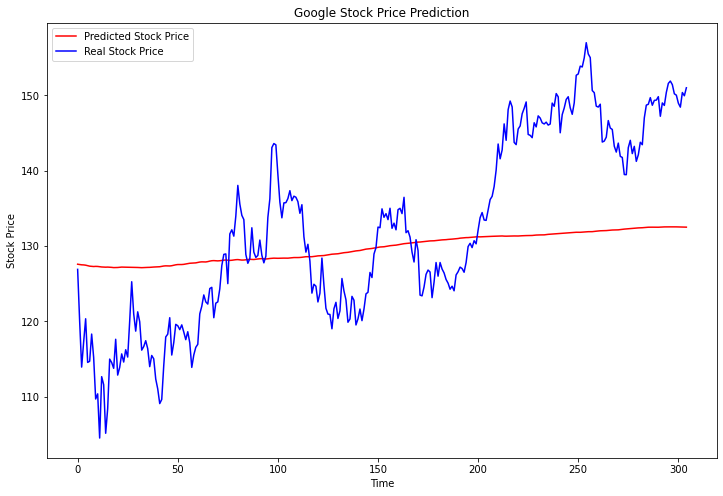

In [780]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price_inverse,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price_original,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()